In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

In [2]:
data = pd.DataFrame(pd.read_csv('data.csv',encoding= 'utf-8'))
holiday =pd.DataFrame(pd.read_csv('holiday.csv',encoding= 'utf-8'))

# Part 1: Explorative Data Analysis

## 1.Find the time span of the order data.

In [3]:
print('The time span of the order data is:',np.min(data.dt),'to',np.max(data.dt))

The time span of the order data is: 2019-01-20 to 2019-03-01


## 2.Find the number of orders each day. 

In [4]:
daily_orders=data.groupby('dt')[['member_id']].count()
daily_orders.columns=['daily number of orders']
daily_orders

,daily number of orders
dt,
2019-01-20,69859
2019-01-21,117686
2019-01-22,118409
2019-01-23,126331
2019-01-24,125764
2019-01-25,122092
2019-01-26,77779
2019-01-27,66399
2019-01-28,106025


### 2-a Boss: we need to design two different strategies for sales in workdays and sales in weekends.
###       True or False? Explain.

In [5]:
holiday_1=holiday[(holiday['dt']>='2019-01-20')&(holiday['dt']<='2019-03-01')]
holiday_1.head()

,dt,month,weekday,week_of_year,type,last_type,holiday_distance,holiday_code
468,2019-01-20,1,7,3,1,0,-15,0
469,2019-01-21,1,1,4,0,0,-14,0
470,2019-01-22,1,2,4,0,0,-13,0
471,2019-01-23,1,3,4,0,0,-12,0
472,2019-01-24,1,4,4,0,0,-11,0


In [6]:
weekday=holiday_1['weekday'].to_frame()
weekday.columns=['weekday']
weekday.index=holiday_1.dt

sum_orders=data.groupby('dt')['dt'].count()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
sum_orders=sum_orders.to_frame()
sum_orders.columns=['daily_number_of_orders']

sum_orders_day=pd.concat([sum_orders,weekday],axis=1)
sum_orders_day.head()

,daily_number_of_orders,weekday
dt,,
2019-01-20,69859,7
2019-01-21,117686,1
2019-01-22,118409,2
2019-01-23,126331,3
2019-01-24,125764,4


In [7]:
workdays_0=sum_orders_day[sum_orders_day['weekday']<6]  
workdays_0.columns=['workdays_orders','weekday']
workdays_0.head()

,workdays_orders,weekday
dt,,
2019-01-21,117686,1
2019-01-22,118409,2
2019-01-23,126331,3
2019-01-24,125764,4
2019-01-25,122092,5


In [8]:
weekends_0=sum_orders_day[sum_orders_day['weekday']>=6]
weekends_0.columns=['weekends_orders','weekday']
weekends_0.head()

,weekends_orders,weekday
dt,,
2019-01-20,69859,7
2019-01-26,77779,6
2019-01-27,66399,7
2019-02-02,64267,6
2019-02-03,43106,7


In [9]:
workdays_1=workdays_0['workdays_orders'].to_frame().describe()
weekends_1=weekends_0['weekends_orders'].to_frame().describe()
compare_0=pd.concat([workdays_1,weekends_1],axis=1)
compare_0

,workdays_orders,weekends_orders
count,30.000000,11.000000
mean,63317.433333,41121.090909
std,38163.933323,24806.559328
min,7113.000000,8241.000000
25%,49000.500000,26296.500000
50%,52038.500000,31964.000000
75%,100210.500000,65333.000000
max,126331.000000,77779.000000


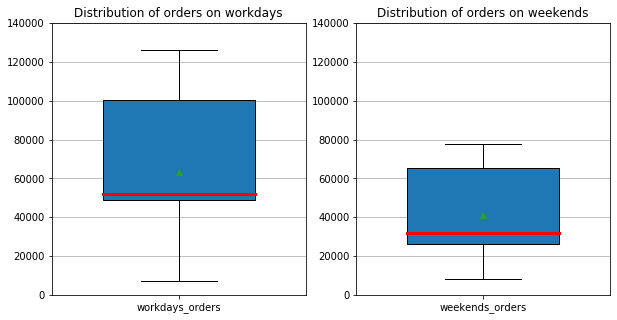

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(workdays_0['workdays_orders'],
            widths=0.6,labels=['workdays_orders'],
           sym='o',vert=True, patch_artist=True,
            meanline=False,showmeans=True,medianprops={'linewidth': '3','color':'red'})
plt.title('Distribution of orders on workdays')
plt.ylim(0,140000)
plt.grid(axis='y') 

plt.subplot(1,2,2)
plt.boxplot(weekends_0['weekends_orders'],
            widths=0.6,labels=['weekends_orders'],
           sym='o',vert=True, patch_artist=True,
            meanline=False,showmeans=True,medianprops={'linewidth': '3','color':'red'})
plt.title('Distribution of orders on weekends')
plt.ylim(0,140000)
plt.grid(axis='y') 

Obviously, we can find that the distribution of orders on workdays are much more than that on weekends from the graph. So it's true.

## 3.Find the number of users.

In [11]:
num_users=data.groupby('member_id').count()
print('The number of users is',len(num_users))

The number of users is 466886


## 4.Find ten commodities with the highest sales.

In [12]:
commodity=data.groupby('commodity_name')[['commodity_name']].count()
commodity.columns=['number of orders']
hotsale_10pro=commodity.sort_values(by=['number of orders'],ascending=False).head(10)
hotsale_10pro

,number of orders
commodity_name,
拿铁,425514
榛果拿铁,219627
澳瑞白,155506
标准美式,148666
香草拿铁,136841
卡布奇诺,115475
摩卡,113754
加浓美式,110526
焦糖玛奇朵,105081


### 4-a Draw graphs with x-axis the commodity name and y-axis the # of orders.

Text(0.5, 1.0, 'Ten commodities with the highest sales')

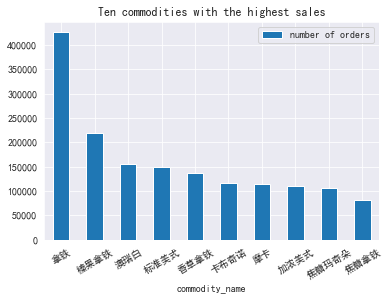

In [13]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
hotsale_10pro.plot(kind='bar',width=0.5) 
plt.xticks(rotation=30)
plt.title('Ten commodities with the highest sales')

## 5.Find the discount rate of each order and concat it onto the original dataset with column name  

In [14]:
discount_rate=round(data.commodity_income/data.commodity_origin_money,2).to_frame()
discount_rate.columns=['discount_rate']
discount_rate.head()
data=pd.concat([data,discount_rate],axis=1)
data.head()

,Unnamed: 0,Unnamed: 0.1,dt,phone_no,member_id,commodity_code,commodity_name,commodity_origin_money,coupon_id,coupon_money,one_category_name,two_category_name,commodity_income,pay_money,coffeestore_share_money,discount_rate
0,0,0,2019-01-25,13901387938,14442,SP025,榛果拿铁,27.0,7045.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
1,1,1,2019-01-27,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,NaN,0.00,饮品,鲜榨果蔬汁,0.00,0.00,0.0,0.00
2,2,2,2019-01-23,13901387938,14442,SP025,榛果拿铁,27.0,5589.0,22.14,饮品,现磨咖啡,4.86,4.86,0.0,0.18
3,3,3,2019-02-01,13901387938,14442,SP025,榛果拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
4,4,4,2019-01-27,13901387938,14442,SP010,巧克力瑞纳冰,27.0,6947.0,14.04,饮品,瑞纳冰,12.96,12.96,0.0,0.48


## 6. Find the average discount of each week. One week should consist of Sunday to Saturday.

In [15]:
week_0=pd.merge(data[['dt','discount_rate']],holiday_1[['dt','week_of_year','weekday']],on='dt',how='inner')
week_1=holiday_1.groupby('week_of_year')[['week_of_year']].count()
week_1.columns=['days_week']
week_1=week_1.loc[week_1['days_week']==7]   # One week consists of 7 days
week_1

,days_week
week_of_year,
4,7
5,7
6,7
7,7
8,7


In [16]:
weekly_orders=week_0.groupby('week_of_year')[['week_of_year']].count()
weekly_orders.columns=['weekly_number_of_orders']
weekly_orders=weekly_orders.loc[(weekly_orders.index>3) & (weekly_orders.index<9)]
 
weekly_discount=week_0.groupby('week_of_year')[['discount_rate']].sum()
weekly_discount.columns=['weekly_discount_sum']
weekly_discount=weekly_discount.loc[(weekly_discount.index>3) & (weekly_discount.index<9)]

weekly_avg_discount=pd.concat([weekly_orders,weekly_discount],axis=1)
avg_discount=(round(weekly_discount.weekly_discount_sum / weekly_orders.weekly_number_of_orders,4)).to_frame()
avg_discount.columns=['weekly_avg_discount'] 
avg_discount

,weekly_avg_discount
week_of_year,
4,0.3800
5,0.4000
6,0.3536
7,0.4709
8,0.4655


## 7.Find the Retention Rate of any five days.  
#### It is the ratio of users purchasing again on the next day. For example, if you want to compute the Retention Rate on 2019-02-10, then you need to find users who bought goods on 02-09 and 02-10.

In [17]:
import datetime
start_date = input('Please enter date (from 2019-01-21 to 2019-02-25): ')
date_0 = datetime.datetime.strptime(start_date, '%Y-%m-%d')

users_0 = [] # the orders of date() (original data)
users_1 = [] # the users of date() (unique)
num_buy = []  
num_buy_again = []  
retention_rate = []  

if (date_0>= datetime.datetime(2019, 1, 21, 0, 0)) & (date_0<= datetime.datetime(2019, 2, 25, 0, 0)):
    for i in range(6):   
        dt_0 = date_0- datetime.timedelta(1)
        dt_1 =  dt_0.strftime("%Y-%m-%d")
        dt_2 =  date_0.strftime("%Y-%m-%d")
        users_0.append(data[data['dt']==dt_1])
        users_1.append(users_0[i].drop_duplicates(subset = ['phone_no'], keep = 'first', inplace = False))
        num_buy.append(len(users_1[i]))  
        if i > 0:
            num_buy_again.append(len(users_1[i-1].phone_no.loc[users_1[i-1].phone_no.isin(users_1[i].phone_no)]))  
            retention_rate.append(round(num_buy_again[i-1] / num_buy[i-1], 4))
        date_0= date_0+datetime.timedelta(1)
        
    date_1=datetime.datetime.strptime(start_date, "%Y-%m-%d")
    date_2=[]
    for j in range(5):
        date_3=date_1+datetime.timedelta(j)
        date_4=date_3.strftime("%Y-%m-%d")
        date_2.append(date_4)
    retention_rate=pd.DataFrame(retention_rate)
    retention_rate.index=date_2
    retention_rate.columns=['retention_rate']
    print(retention_rate)
     
else: 
    print('The date is not acceptable!')

Please enter date (from 2019-01-21 to 2019-02-25): 2019-01-21
            retention_rate
2019-01-21          0.1523
2019-01-22          0.2463
2019-01-23          0.2353
2019-01-24          0.2278
2019-01-25          0.2210


## 8.Find the Week Retention Rate of any day 
#### which means finding users buying at that day and buying again within the next seven days.

In [18]:
import datetime
w_date = input('Please enter date(from 2019-01-20 to 2019-02-22): ')
w_date_0 = datetime.datetime.strptime(w_date, '%Y-%m-%d')

w_users_0 = [] # the orders of date() (original data)
w_users_1 = [] # the users of date() (unique)

if (w_date_0>= datetime.datetime(2019, 1, 20, 0, 0)) & (w_date_0<=datetime.datetime(2019, 2, 22, 0, 0)):
    w_users_0.append(data[data['dt']==w_date])
    w_users_1.append(w_users_0[0].drop_duplicates(subset = ['phone_no'], keep = 'first', inplace = False))
    w_num_users_buy = len(w_users_1[0])  
    w_date_1=w_date_0+datetime.timedelta(7)
    w_date_1=w_date_1.strftime("%Y-%m-%d")
    w_users_0.append(data[(data['dt'] > w_date) & (data['dt'] <=w_date_1)])
    w_users_1.append(w_users_0[1].drop_duplicates(subset = ['phone_no'], keep = 'first', inplace = False))
    w_users_buy_again = w_users_1[0].phone_no.loc[w_users_1[0].phone_no.isin(w_users_1[1].phone_no)]
    w_num_users_buy_again = len(w_users_buy_again)  
    retention_rate = round(w_num_users_buy_again/w_num_users_buy,4)
    print('The week retention rate of {} is :'.format(w_date), retention_rate) 
else: 
    print('The date is not acceptable!')              

Please enter date(from 2019-01-20 to 2019-02-22): 2019-01-20
The week retention rate of 2019-01-20 is : 0.5108


## 9.Find the Week Retention Rate of any day for new users 
#### which means finding users buying at that day for the first time and buying again within the next seven days.

In [19]:
import datetime

new_w_date=input('Please enter the date(from 2019-01-20 to 2019-02-22):')
new_w_date_0= datetime.datetime.strptime(new_w_date, '%Y-%m-%d')

new_w_users_0 = [] # the orders of date() (original data)
new_w_users_1 = [] # the users of date() (unique)

if (new_w_date_0>=datetime.datetime(2019, 1, 20, 0, 0)) & (new_w_date_0 <= datetime.datetime(2019, 2, 22, 0, 0)):
    new_w_users_0.append(data[data['dt']==new_w_date])
    new_w_users_1.append(new_w_users_0[0].drop_duplicates(subset = ['phone_no'], keep = 'first', inplace = False))
    new_w_users_0.append(data[data['dt'] < new_w_date])
    new_w_users_1.append(new_w_users_0[1].drop_duplicates(subset = ['phone_no'], keep = 'first', inplace = False))
    new_w_users = new_w_users_1[0][-new_w_users_1[0].phone_no.isin(new_w_users_1[1].phone_no)] 
    # new users= all users- old users
    new_w_date_1=new_w_date_0+datetime.timedelta(7)
    new_w_date_1=new_w_date_1.strftime("%Y-%m-%d")
    new_w_users_0.append(data[(data['dt'] > new_w_date) & (data['dt'] <=new_w_date_1)])
    new_w_users_1.append(new_w_users_0[2].drop_duplicates(subset = ['phone_no'], keep = 'first', inplace = False))
    new_w_users_buy_again = new_w_users.phone_no.loc[new_w_users.phone_no.isin( new_w_users_1[2].phone_no)]
    new_week_retention_rate= round(len(new_w_users_buy_again) / len(new_w_users), 4)
    print('The week retention rate of {} for new users:'.format(new_w_date), new_week_retention_rate) 
else: 
    print('The date is not acceptable!')  

Please enter the date(from 2019-01-20 to 2019-02-22):2019-01-20
The week retention rate of 2019-01-20 for new users: 0.5108


## 10.Find the Retention Rate WITHIN one week of new users.
#### You could choose any week you want, but it must consist of Sunday to Saturday. You need to find users buying the first product and buying again within that week.

In [20]:
# choose week1 of this time span: 2019-01-21 to 2019-01-27
users_0120=data[data['dt']=='2019-01-20']
users_week1_0 = data[(data['dt'] >= '2019-01-21') & (data['dt'] <= '2019-01-27')] # week1 begins from 2019-01-21 to 2019-01-27
users_week1_1 = users_week1_0.drop_duplicates(subset = ['phone_no'], keep = 'first', inplace = False)
week1_new_users=users_week1_1[-users_week1_1['phone_no'].isin(users_0120['phone_no'])]
 # new users= all users- old users
num_week1_new_users = len(week1_new_users) 
week1_orders_0 = users_week1_0.groupby(['member_id','dt'])['member_id'].count().to_frame()
week1_orders_0.columns=['num_ordes_item']
week1_orders_0=week1_orders_0.reset_index()
week1_orders_0.columns=['member_id','dt','num_ordes_item'] 

week1_orders_1=week1_orders_0.groupby('member_id')[['dt']].count()
week1_orders_1.columns=['buy_times']
week1_orders_2=week1_orders_1[week1_orders_1['buy_times']>1]
week1_orders_2=week1_orders_2.reset_index()
week1_orders_2.columns=['member_id','buy_times']

week1_orders_3=week1_new_users['member_id'].loc[week1_new_users['member_id'].isin(week1_orders_2['member_id'])]
num_new_week1_buy_again=len(week1_orders_3)
retention_rate_within_week1 = round(num_new_week1_buy_again / num_week1_new_users, 4)
print('The retention rate within week1: 2019-01-21 to 2019-01-27 of new users:', retention_rate_within_week1)

The retention rate within week1: 2019-01-21 to 2019-01-27 of new users: 0.3058


## 11.Find “Active Users” 
#### which means the number of orders of one user is greater equal to 5

In [21]:
active_users_0 = data.groupby('member_id')[['commodity_code']].count()
active_users_0.columns=['buy_times']
active_users_0=active_users_0.buy_times
active_users_1= active_users_0[active_users_0>= 5]
active_users_2={'member_id':active_users_1.index,'buy_times':active_users_1.values}
active_users= pd.DataFrame(active_users_2)
print('The number of active_users is:',len(active_users))

The number of active_users is: 166308


In [22]:
active_users.head()

,member_id,buy_times
0,1525,7
1,1533,12
2,1557,50
3,1574,24
4,1575,139


## 12.Write the table you get in 11 as a csv file with filename ActiveUser.csv. 

In [23]:
active_users.to_csv('ActiveUser.csv')

## 13.Provide a description of the number of orders for each active user (# of ActiveUser, mean, range,std, variance, skewness and kurtosis) 

In [24]:
active_user=pd.pivot_table(active_users,index=['member_id'])
num_active_user=round(float(active_user.count()),4)
mean=round(float(active_user.mean()), 4)
range_0=round(float(active_user.max()-active_user.min()),4)
std = round(float(active_user.std()), 4)
var = round(float(active_user.var()), 4)
skew = round(float(active_user.skew()), 4)
kurt = round(float(active_user.kurt()), 4)
desc_active_user=pd.DataFrame([num_active_user,mean,range_0,std,var,skew,kurt])
desc_active_user.columns=['description']
desc_active_user.index=['# of ActiveUser','mean','range','std','var','skew','kurt']
desc_active_user

,description
# of ActiveUser,166308.0000
mean,10.4182
range,580.0000
std,7.5992
var,57.7485
skew,6.5425
kurt,241.3580


In [25]:
num_active_user=round(float(active_user.count()),4)
mean=round(float(active_user.mean()), 4)
range_0=round(float(active_user.max()-active_user.min()),4)
std = round(float(active_user.std()), 4)
var = round(float(active_user.var()), 4)
skew = round(float(active_user.skew()), 4)
kurt = round(float(active_user.kurt()), 4)
desc_active_user=pd.DataFrame([num_active_user,mean,range_0,std,var,skew,kurt])
desc_active_user.columns=['description']
desc_active_user.index=['# of ActiveUser','mean','range','std','var','skew','kurt']
desc_active_user

,description
# of ActiveUser,166308.0000
mean,10.4182
range,580.0000
std,7.5992
var,57.7485
skew,6.5425
kurt,241.3580


# Part 2: Data Preprocessing

## 1. Remove the first column of the data in data.csv  

In [26]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head()

,Unnamed: 0.1,dt,phone_no,member_id,commodity_code,commodity_name,commodity_origin_money,coupon_id,coupon_money,one_category_name,two_category_name,commodity_income,pay_money,coffeestore_share_money,discount_rate
0,0,2019-01-25,13901387938,14442,SP025,榛果拿铁,27.0,7045.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
1,1,2019-01-27,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,NaN,0.00,饮品,鲜榨果蔬汁,0.00,0.00,0.0,0.00
2,2,2019-01-23,13901387938,14442,SP025,榛果拿铁,27.0,5589.0,22.14,饮品,现磨咖啡,4.86,4.86,0.0,0.18
3,3,2019-02-01,13901387938,14442,SP025,榛果拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
4,4,2019-01-27,13901387938,14442,SP010,巧克力瑞纳冰,27.0,6947.0,14.04,饮品,瑞纳冰,12.96,12.96,0.0,0.48


## 2. Boss: To implement Collaborative Filtering in recommendation systems, we need a user-item table to show the number of orders for each user and each item. 
## Try to construct user-item table. An example of user-item pair: (Phone_No, 标准美式)

In [27]:
user_items_0 = data[[ 'phone_no', 'commodity_name']]
user_items_0.columns = ['phone_no', 'commodity_name'] 
user_item= pd.pivot_table(user_items_0, index = ['phone_no'], columns = ['commodity_name'],aggfunc = len,fill_value=0)
user_item.head()

commodity_name,NFC鲜榨橙汁,NFC鲜榨芒果汁,NFC鲜榨芒果混合果汁,NFC鲜榨荔枝汁,NFC鲜榨蓝莓草莓混合果汁,依云矿泉水330ml,加浓美式,卡布奇诺,卡布奇诺瑞纳冰,土豆烧牛方饭,...,蜜汁叉烧包,金枪鱼谷物沙拉,陈皮普洱,香椰提子麦芬,香草拿铁,香蕉核桃麦芬,鱼香茄子饭,鸡蛋马铃薯双拼三明治,黑森林蛋糕,黑金气泡美式
phone_no,,,,,,,,,,,,,,,,,,,,,
51379898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57047978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61120518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62288158,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64618166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Boss: Life is not like a Markov Chain, which means everyone's past behavior is correlated with his present one. And that is why we could exploit past purchase behavior to predict their future buying trends. 

## Try to construct a dataset to show this past purchasing behavior trend. 

#### For convenience, several instructions are proposed as follows

#### a.Two days correspond to one dimension.

#### b.The last two days of the time span of the data should be the future, which means it corresponds to the target field for the following data mining models.

#### c.The length of each user vector must be maximized.

#### d.The dataset should be a DataFrame in Pandas, so you could customize the columns as you wish. 
#### For example, if the time span is from 2019-02-01 to 2019-02-10, then there are 10 days altogether. So each user corresponds to a 5-dimensional vector, with 4 features and 1 target dimension. The vector [4, 0, 0, 0, 1] means this user bought one good between 02-09 and 02-10, and four goods between 02-01 and 02-02. Additionally, the length of each user vector MUST BE 5 because of the rule 3. 

In [28]:
user_0121_to_0301 = data[data['dt'] > '2019-01-20'][['phone_no','dt']]
user_0121_to_0301.columns = ['phone_no', 'dt']
user_0121_to_0301.head()

,phone_no,dt
0,13901387938,2019-01-25
1,13901387938,2019-01-27
2,13901387938,2019-01-23
3,13901387938,2019-02-01
4,13901387938,2019-01-27


In [29]:
import datetime
import math

beginning_date_0=np.min(data.dt)
beginning_date=datetime.datetime.strptime(beginning_date_0, '%Y-%m-%d')
finishing_date_0=np.max(data.dt)
finishing_date=datetime.datetime.strptime(finishing_date_0, '%Y-%m-%d')
time_span=(finishing_date-beginning_date).days+1
#time_span=41
#The length of each user vector is 20

def no_vector(dt):
    dt = datetime.datetime.strptime(dt, '%Y-%m-%d')
    beginning_date = datetime.datetime(2019, 1, 20, 0, 0)
    finishing_date = datetime.datetime(2019, 3, 1, 0, 0)
    no_dt= math.ceil(((dt-beginning_date).days)/2)
    return no_dt

dim_dt = (user_0121_to_0301.dt.apply(lambda x: no_vector(x))).to_frame()
dim_dt.columns=['no_dt'] 
dim_dt= pd.concat([user_0121_to_0301, dim_dt], axis =1)
dim_dt.head()

,phone_no,dt,no_dt
0,13901387938,2019-01-25,3
1,13901387938,2019-01-27,4
2,13901387938,2019-01-23,2
3,13901387938,2019-02-01,6
4,13901387938,2019-01-27,4


In [31]:
user_behavior_0 = pd.pivot_table(dim_dt, index = ['phone_no'], columns =['no_dt'], aggfunc = len, fill_value = 0)
user_behavior_0.head()

dt                                                         
no_dt    1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20
phone_no                                                            
51379898  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
62288158  0  0  0  0  1  0  0  0  0  0  1  0  1  0  0  1  1  0  0  1
65310185  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
67443044  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
67469370  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

# Part 3: Model Training and Prediction 

## Boss: For the target field, 1 means he purchased in the future and 0 means he did not. Then you could use traditional classification algorithms to predict the future behaviors of all users. 

## 1.Transform the data you got from the last section into an array in Numpy. 

In [32]:
user_behavior_1 = np.array(user_behavior_0)

## 2.Split the data into features X and targets Y. 

In [33]:
X= user_behavior_1[:,0:19] 
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [34]:
Y=user_behavior_1[:,19]
Y

array([0, 1, 0, ..., 3, 0, 0], dtype=int64)

In [35]:
Y_1=Y
Y_1[Y_1 > 0] = 1
Y_1

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

# Having not finished